In [1]:
##### Spreadsheet Analogy #####
# Data stored in two tables: pore data, throat data
# in each table, each pore is a row and each property is a column
import openpnm as op
import numpy as np
op.visualization.set_mpl_style()
np.random.seed(0)
pn = op.network.Demo(shape=[4, 1, 1])

In [2]:
# using pandas to visualize this
import pandas as pd
pore_data_sheet = pd.DataFrame({k: pn[k] for k in pn.props(element='pore') if pn[k].ndim == 1})
pore_data_sheet

,pore.coordination_number,pore.diameter,pore.max_size,pore.seed,pore.volume
0,1.0,0.474407,1.0,0.474407,0.055905
1,2.0,0.557595,1.0,0.557595,0.090773
2,2.0,0.501382,1.0,0.501382,0.065994
3,1.0,0.472442,1.0,0.472442,0.055213


In [3]:
# column can be extracted by
column = pore_data_sheet['pore.volume']
print(column)

0    0.055905
1    0.090773
2    0.065994
3    0.055213
Name: pore.volume, dtype: float64


In [4]:
# or individual elements
print(pore_data_sheet['pore.volume'][0])

0.05590507143096387


In [5]:
##### Rules to maintain data integrity #####
# Rule: All values (whatever data type) are converted to Numpy arrays
pn['throat.list'] = [1, 2, 3]
print(type(pn['throat.list']))

<class 'numpy.ndarray'>


In [6]:
# Rule: Dictionary key must start with 'pore' or 'throat'
try:
    pn['foo.bar'] = 0
except:
    print('This will throw an exception since the dict name cannot start with foo')


This will throw an exception since the dict name cannot start with foo


In [7]:
# Rule: Each new data should be an array of the same length as pore or throat OR a scalar (so every pore/throat has data)
try:
    pn['pore.test'] = [0, 0, 0]
except:
    print('This will throw an exception since there are 4 pores, hence all pore arrays should be 4 elements long')

This will throw an exception since there are 4 pores, hence all pore arrays should be 4 elements long


In [8]:
# Rule: Every scalar value is converted to an array of N_pore or N_throat length
pn['pore.test'] = 0
print(pn['pore.test'])

[0 0 0 0]


In [9]:
# Rule: Nested dictionaries (dictionaries inside of dictionaries) are allowed
pn['pore.concentration'] = {'species_A': 0, 'species_B': 1}
print(pn['pore.concentration'])

{'species_A': array([0, 0, 0, 0]), 'species_B': array([1, 1, 1, 1])}


In [10]:
# printing a value with a key in the nested dictionary
print(pn['pore.concentration.species_A'])
# indexing a value with a key in the nested dictionary
pn['pore.concentration']['species_A']

[0 0 0 0]


array([0, 0, 0, 0])

In [11]:
# Rule: Boolean arrays are treated as labels, Numerical arrays are treated as properties
pn['pore.labelsample'] = False
print(pn.labels(element='pore'))

['pore.labelsample', 'pore.left', 'pore.right', 'pore.surface', 'pore.xmax', 'pore.xmin']


In [12]:
# no pores has this label cause it's all false
pn.pores('labelsample')

array([], dtype=int32)

In [13]:
# but now it does
pn['pore.labelsample'][[0, 1, 2]] = True
print(pn.pores('labelsample'))

[0 1 2]


In [14]:
# you can use set_label to label pores/throats
pn.set_label('another', pores=[2, 3])
print(pn.pores('another'))

[2 3]


In [15]:
# Dictionary keys with a leading underscor are hidden
pn['pore._hidden'] = 1
print(pn.props())

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
1     : pore.concentration.species_A
2     : pore.concentration.species_B
3     : pore.coordination_number
4     : pore.coords
5     : pore.diameter
6     : pore.max_size
7     : pore.seed
8     : pore.test
9     : pore.volume
10    : throat.conns
11    : throat.cross_sectional_area
12    : throat.diameter
13    : throat.diffusive_size_factors
14    : throat.hydraulic_size_factors
15    : throat.length
16    : throat.lens_volume
17    : throat.list
18    : throat.max_size
19    : throat.spacing
20    : throat.total_volume
21    : throat.volume
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [16]:
# It doesn't show up, but can be extracted
pn['pore._hidden']

array([1, 1, 1, 1])

In [17]:
print('pore._hidden' in pn.keys())

True


In [19]:
##### The param prefix #####
# There are properties that are constant -- cannot be changed -- so they cannot be set by a scalar value
# for this, you can use param
pn.params['lattice_connectivity'] = 6
print(pn.params)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Parameters                          Value
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
dimensionality                      (3,)
lattice_connectivity                6
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [22]:
pn['param.test'] = 2
print(pn.params)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Parameters                          Value
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
dimensionality                      (3,)
lattice_connectivity                6
test                                2
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


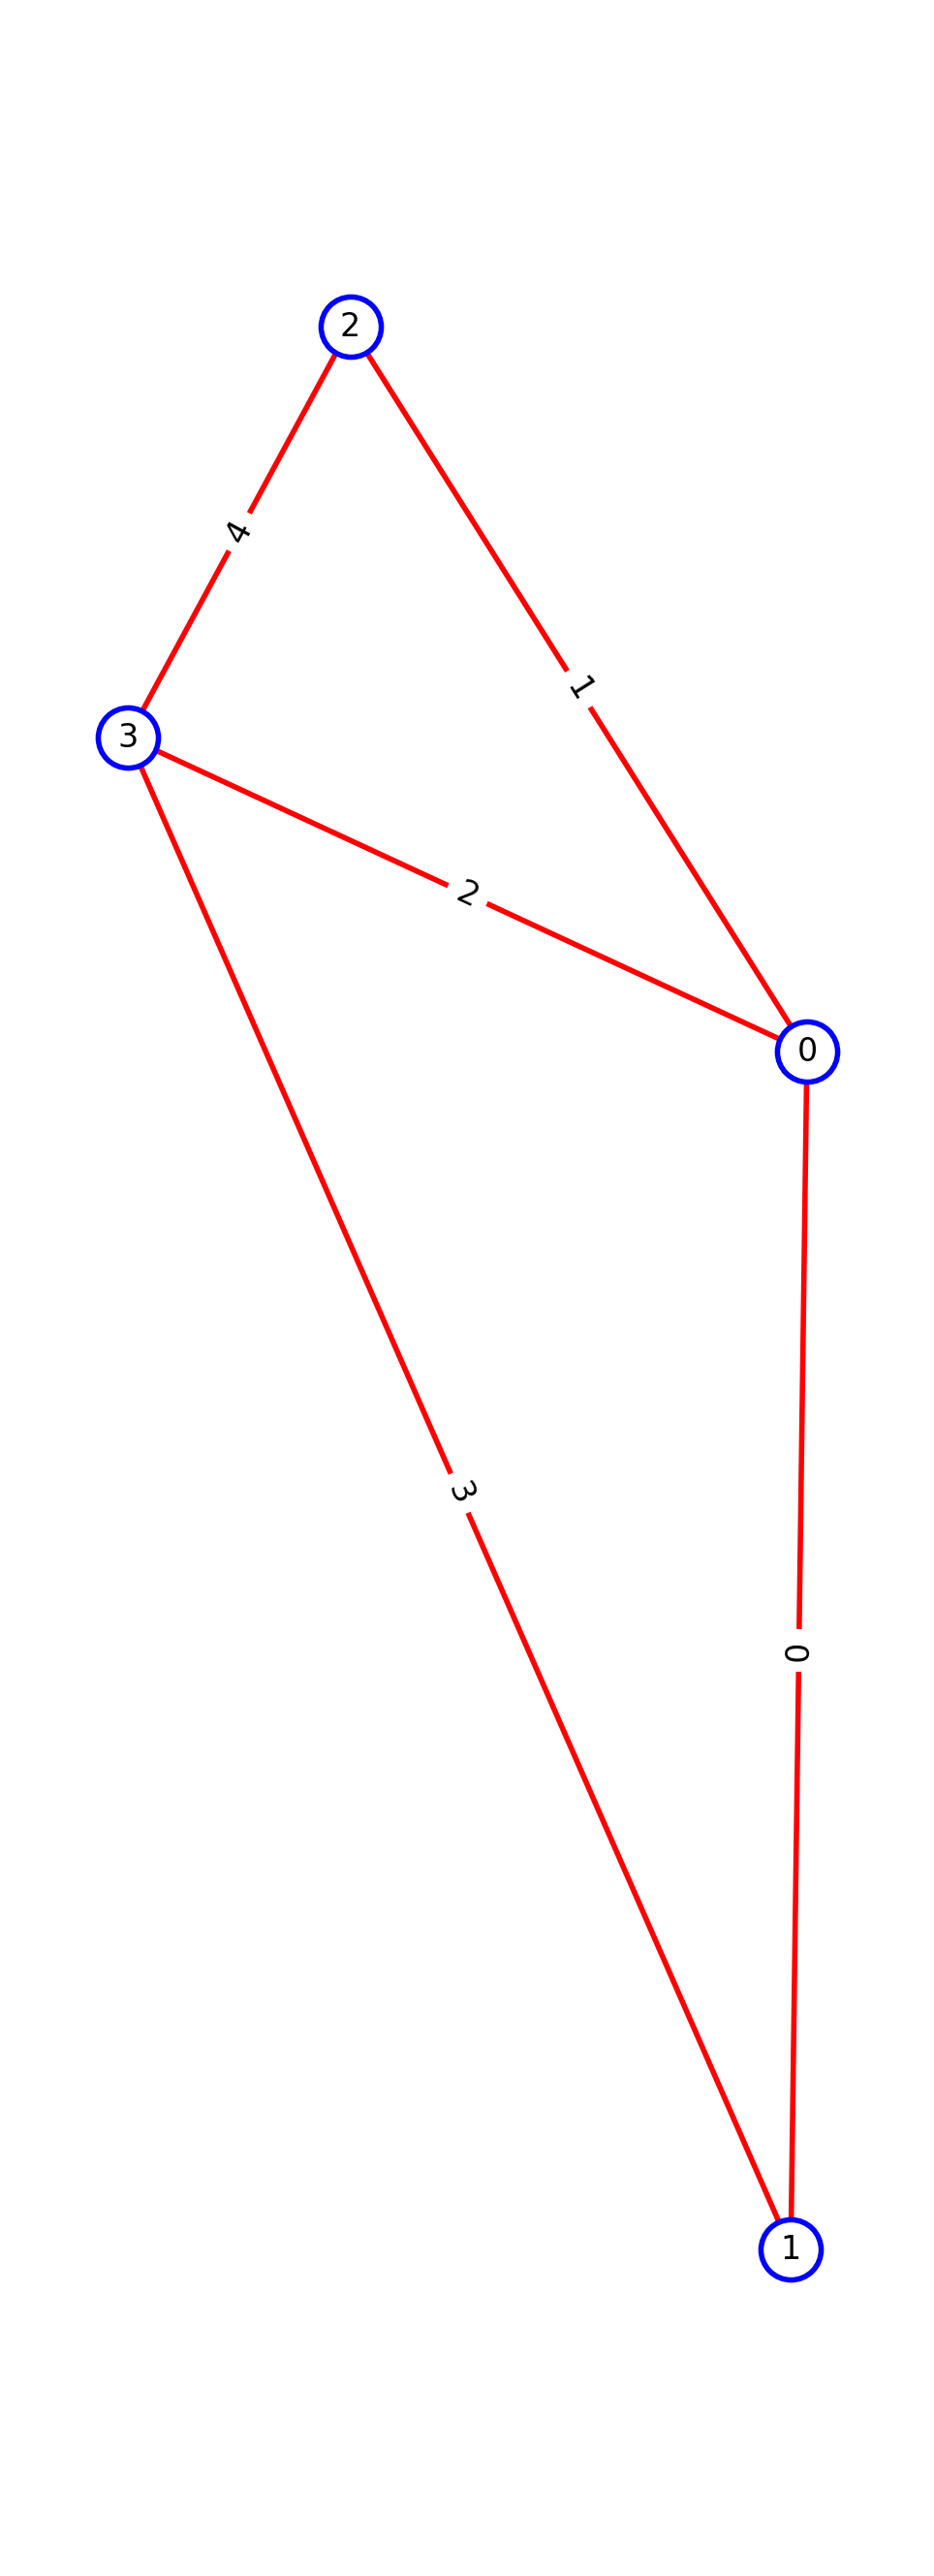

In [23]:
##### Data storage in topology #####
# The pores on either end of a throat are just another property to be stored, along with diameter
np.random.seed(0)
dn = op.network.Delaunay(points=4, shape=[1, 1, 0])
op.visualization.plot_tutorial(dn);

In [24]:
# throat has a property that stores its connections
print(dn['throat.conns'])

[[0 1]
 [0 2]
 [0 3]
 [1 3]
 [2 3]]


In [25]:
# Topology Rules:
# - A throat is a connection between exactly two pores, no more and no less
# - Throats are non-directional, meaning that flow in either direction is equal
# - Pores can have an arbitrary number of throats, including zero; however, pores with zero throats lead to singular matrices and other problems so should be avoided.
# - Two pores are generally connected by no more than one throat. Multiple throats should be avoided

In [26]:
##### Other Things #####
# Sparse adjacency matrix can be generated
am = dn.create_adjacency_matrix(weights=dn.Ts, triu=True)
print(am)

  (0, 1)	0
  (0, 2)	1
  (0, 3)	2
  (1, 3)	3
  (2, 3)	4


In [27]:
# which can be converted into a dense array (1 means connection, 0 means no connection)
am = dn.create_adjacency_matrix()
print(am.todense())

[[0 1 1 1]
 [1 0 0 1]
 [1 0 0 1]
 [1 1 1 0]]


In [28]:
# OpenPNM uses the sparse way (COO) cause if it's dense, there's gonna be so many zeroes - waste of space
# but you can convert to other forms (e.g., CSR, LIL) using creat_adjacency_matrix method

In [40]:
# Conduit data - data on 1 throat and 2 pore truple
D = pn.get_conduit_data('diameter')
print(D)

[[0.47440675 0.23720338 0.55759468]
 [0.55759468 0.25069084 0.50138169]
 [0.50138169 0.2362208  0.47244159]]
[[0.47440675 0.55759468]
 [0.55759468 0.50138169]
 [0.50138169 0.47244159]]


In [41]:
# the above is set up like [pore1 throat pore2]
print(pn['throat.diameter'])
R1_R2 = pn['pore.diameter'][pn.conns]
print(R1_R2)

[0.23720338 0.25069084 0.2362208 ]
[[0.47440675 0.55759468]
 [0.55759468 0.50138169]
 [0.50138169 0.47244159]]


In [39]:
# left and right are dependent on the throat.conns array
print(pn.conns)

[[0 1]
 [1 2]
 [2 3]]
